# Cervical Cancer Risk Classification




In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors, svm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

!pip install scikit-plot
import scikitplot as skplt
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cervical_cancer_project/df_imputation.csv', index_col=0)
#df_imputation is the new CSV file that doesn't have any null values.

In [ ]:
df = df.astype('float64')

# Input : features
x = df.drop('Biopsy', axis=1)

# Output : prediction
y = df['Biopsy']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)
x_train1,x_test1,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.25, random_state = 1) # for knn

l= []  #List to store the various model metrics

In [ ]:
LR_model = LogisticRegression(random_state=1).fit(x_train, y_train)
DT_model = DecisionTreeClassifier().fit(x_train, y_train)
RF_model = RandomForestClassifier().fit(x_train, y_train)
GNB_model = GaussianNB().fit(x_train, y_train)
knn_model = KNeighborsClassifier().fit(x_train1, y_train)

models = []
models.append(('GNB', GNB_model))
models.append(('DT', DT_model))
models.append(('RF', RF_model))
models.append(('LR', LR_model))
models.append(('KNN', knn_model))
results = []

for name, model in models:
  if (name=="KNN"):
    res = {}
    res['model'] = name
    ypred = model.predict(x_test1)
    res['Train_Score'] = model.score(x_train1,y_train)
    res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    res['f1score'] = metrics.f1_score(y_test,ypred)
    res['recall'] = metrics.recall_score(y_test, ypred)
    res['precision'] = metrics.precision_score(y_test, ypred)
    res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    results.append(res)
  else:
    res = {}
    res['model'] = name
    ypred = model.predict(x_test)
    res['Train_Score'] = model.score(x_train,y_train)
    res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    res['f1score'] = metrics.f1_score(y_test,ypred)
    res['recall'] = metrics.recall_score(y_test, ypred)
    res['precision'] = metrics.precision_score(y_test, ypred)
    res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    results.append(res)
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,GNB,0.148089,0.095238,0.112150,1.000000,0.059406,0.520202
1,DT,1.000000,0.947619,0.645161,0.833333,0.526316,0.893939
2,RF,1.000000,0.952381,0.666667,0.833333,0.555556,0.896465
3,LR,0.968153,0.942857,0.454545,0.416667,0.500000,0.695707
4,KNN,0.955414,0.938095,0.380952,0.333333,0.444444,0.654040


# Grid Search

In [ ]:
from sklearn.pipeline import Pipeline
#pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.2s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (best_clf.best_score_, best_clf.best_params_))

means = best_clf.cv_results_['mean_test_score']
stds = best_clf.cv_results_['std_test_score']
params = best_clf.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
tree = DecisionTreeClassifier()
tree_param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6],
    'max_features':['auto','log2'],
    'random_state':[123]
}

grid = GridSearchCV(tree, tree_param, cv=10)
best_parameter_search = grid.fit(x_train,y_train)
best_parameter_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'best'}

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
LR = LogisticRegression()

grid = GridSearchCV(LR, grid, cv=10)
best_parameter_search = grid.fit(x_train,y_train)
best_parameter_search.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [ ]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
GN = GaussianNB()
grid = GridSearchCV(GN, parameters, cv=10)
best_parameter_search = grid.fit(x_train,y_train)
best_parameter_search.best_params_

{'var_smoothing': 0.01}

After grid search all algorithms


In [ ]:
LR_model = LogisticRegression(random_state=1, C=1.0, penalty='l2').fit(x_train, y_train)
DT_model = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features='auto',random_state=123,splitter='best').fit(x_train, y_train)
RF_model = RandomForestClassifier(n_estimators=90, max_features=21, criterion='gini').fit(x_train, y_train)
GNB_model = GaussianNB(var_smoothing=0.01).fit(x_train, y_train)
knn_model = KNeighborsClassifier(n_neighbors=27).fit(x_train1, y_train)

models = []
models.append(('GNB', GNB_model))
models.append(('DT', DT_model))
models.append(('RF', RF_model))
models.append(('LR', LR_model))
models.append(('KNN', knn_model))
results = []

for name, model in models:
  if (name=="KNN"):
    res = {}
    res['model'] = name
    ypred = model.predict(x_test1)
    res['Train_Score'] = model.score(x_train1,y_train)
    res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    res['f1score'] = metrics.f1_score(y_test,ypred)
    res['recall'] = metrics.recall_score(y_test, ypred)
    res['precision'] = metrics.precision_score(y_test, ypred)
    res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    results.append(res)
  else:
    res = {}
    res['model'] = name
    ypred = model.predict(x_test)
    res['Train_Score'] = model.score(x_train,y_train)
    res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    res['f1score'] = metrics.f1_score(y_test,ypred)
    res['recall'] = metrics.recall_score(y_test, ypred)
    res['precision'] = metrics.precision_score(y_test, ypred)
    res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    results.append(res)
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,GNB,0.915605,0.885714,0.142857,0.166667,0.125000,0.547980
1,DT,0.968153,0.961905,0.733333,0.916667,0.611111,0.940657
2,RF,1.000000,0.957143,0.709677,0.916667,0.578947,0.938131
3,LR,0.968153,0.942857,0.454545,0.416667,0.500000,0.695707
4,KNN,0.939490,0.942857,0.250000,0.166667,0.500000,0.578283


## Plot metrics :


*   Confusion matrix
*   ROC AUC Curve
*   Precision-Recall Curve
*   Calibration Curve (Reliability Curves)



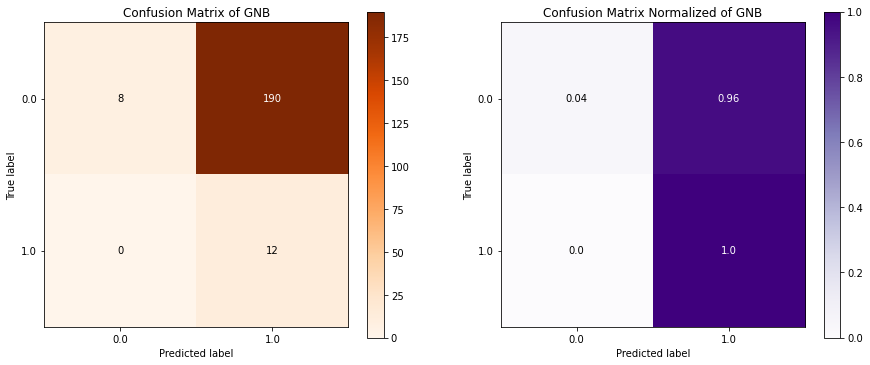

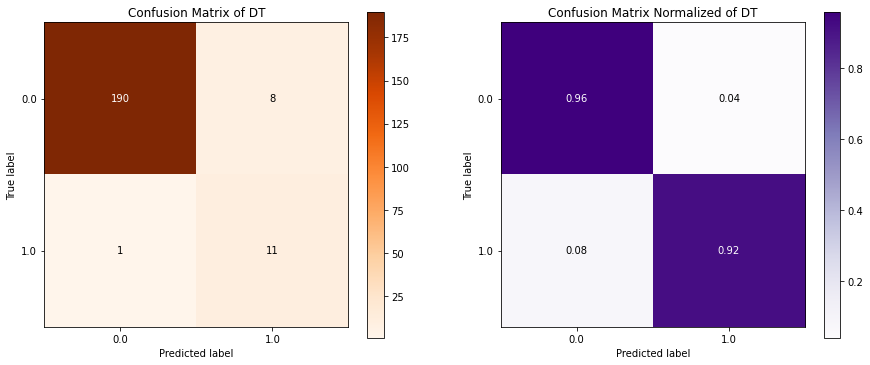

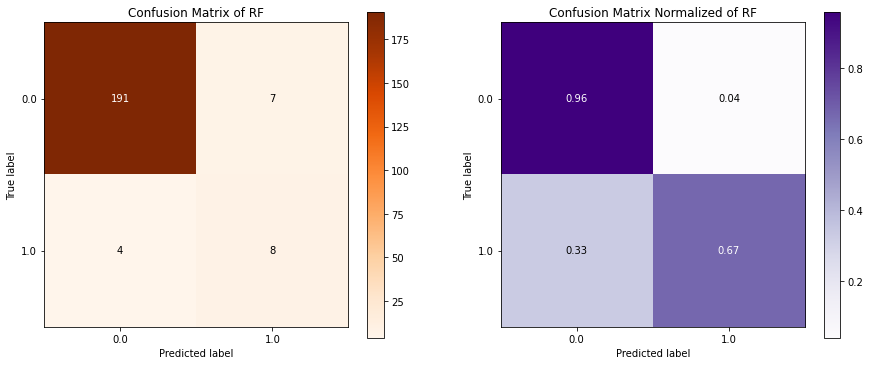

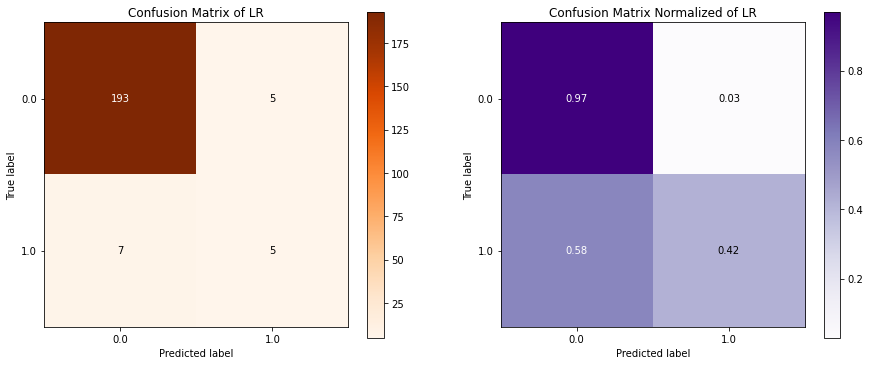

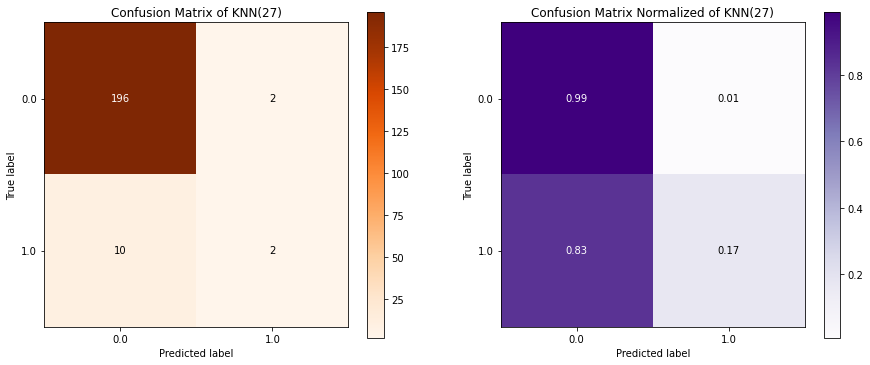

In [ ]:
for name, model in models:
  if (name=="KNN(27)"):
    Y_test_pred = model.predict(x_test1)
  else:
    Y_test_pred = model.predict(x_test)

  fig = plt.figure(figsize=(15,6))
  ax1 = fig.add_subplot(121)
  skplt.metrics.plot_confusion_matrix(y_test, Y_test_pred, title="Confusion Matrix of "+name, cmap="Oranges", ax=ax1)

  ax2 = fig.add_subplot(122)
  skplt.metrics.plot_confusion_matrix(y_test, Y_test_pred, normalize=True, title="Confusion Matrix Normalized of "+name, cmap="Purples", ax=ax2);

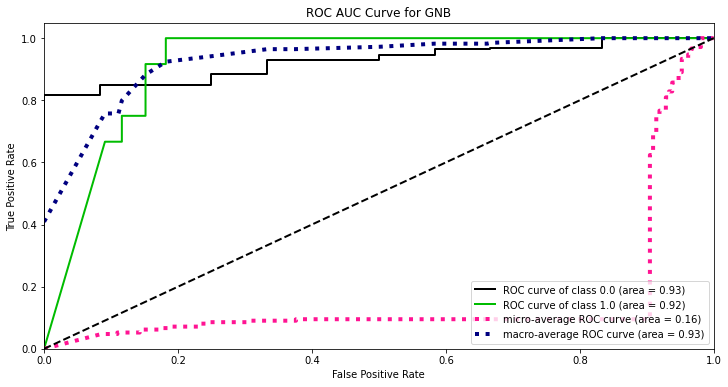

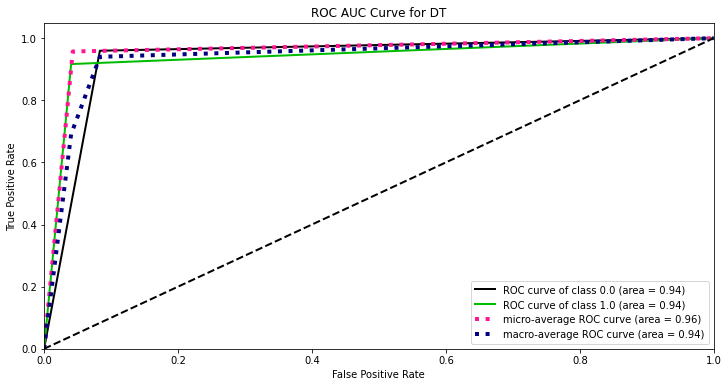

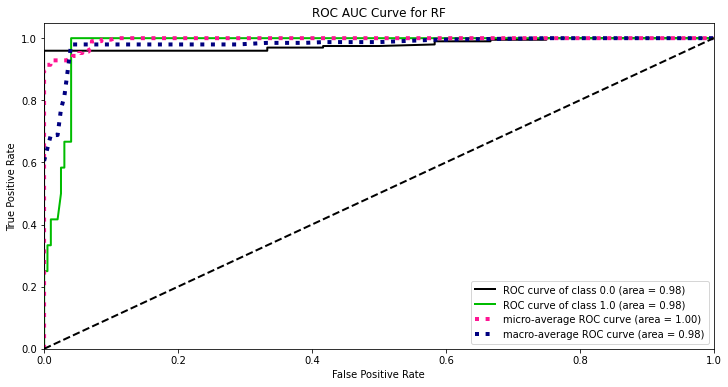

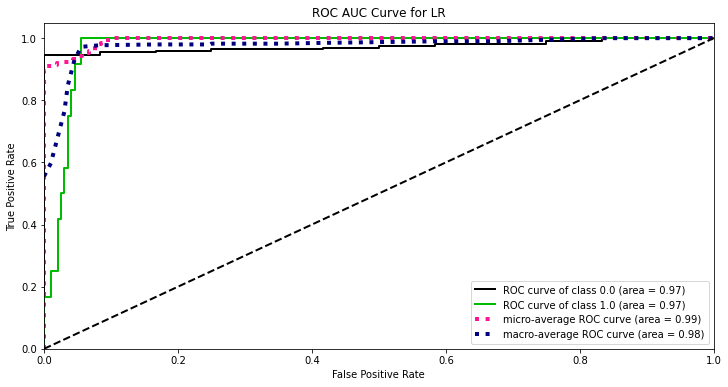

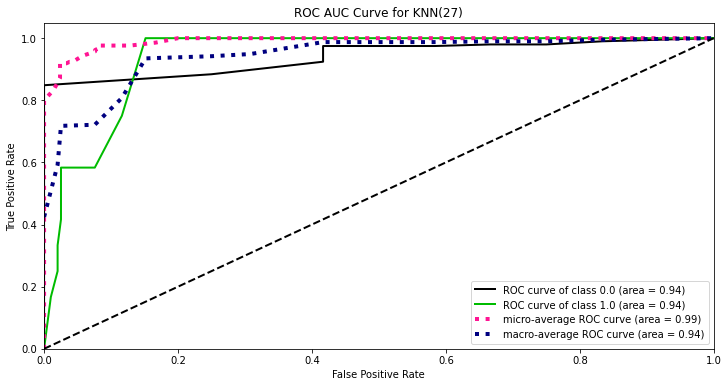

In [ ]:
#Roc auc curve
for name, model in models:
  if (name=="KNN(27)"):
    Y_test_probs = model.predict_proba(x_test1)
  else:
    Y_test_probs = model.predict_proba(x_test)

  skplt.metrics.plot_roc_curve(y_test, Y_test_probs,title="ROC AUC Curve for "+name, figsize=(12,6));

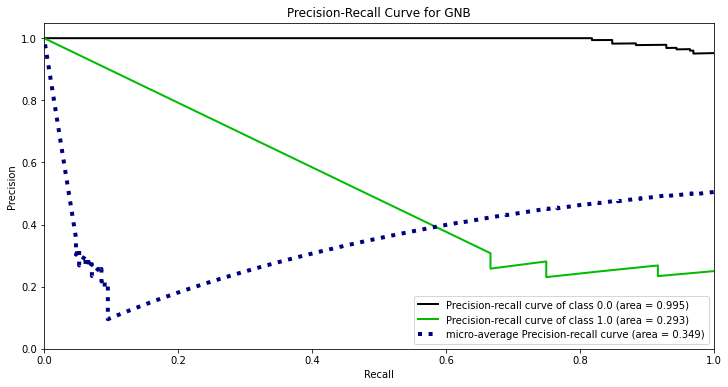

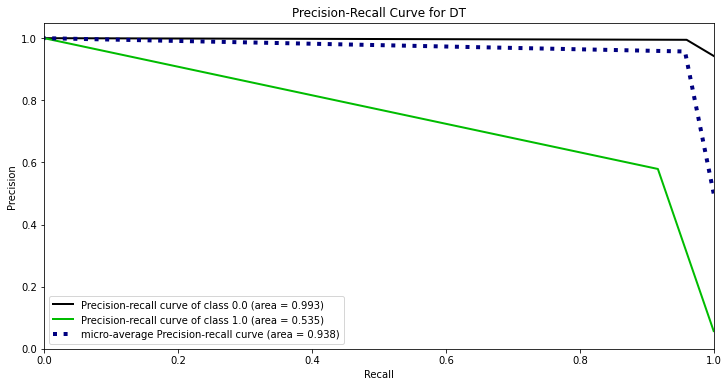

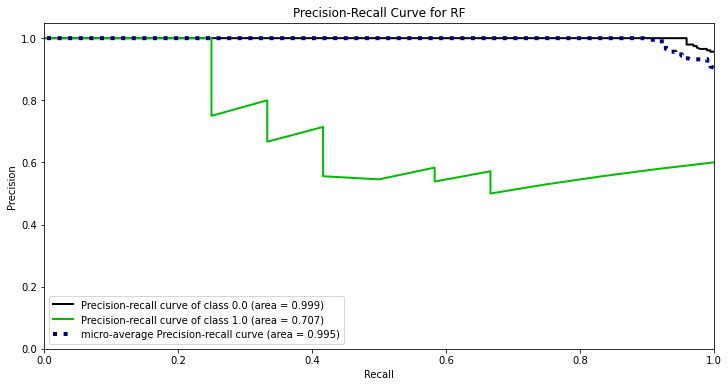

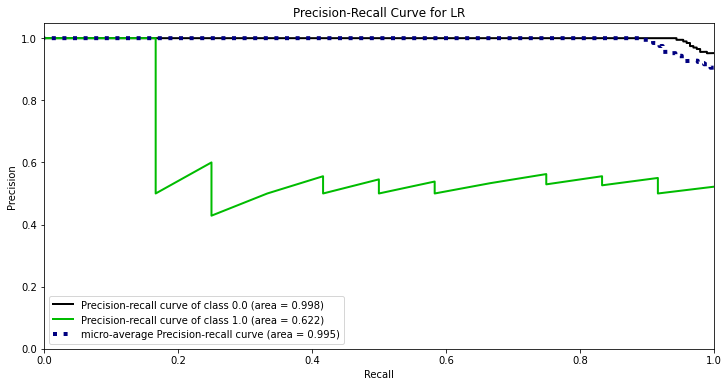

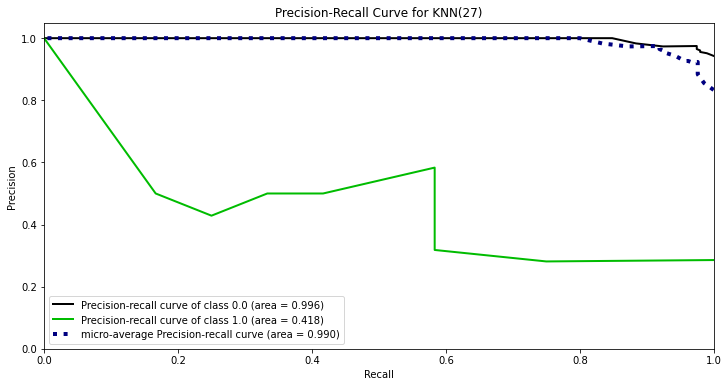

In [ ]:
#Precision-Recall Curve
for name, model in models:
  if (name=="KNN(27)"):
    Y_test_probs = model.predict_proba(x_test1)
  else:
    Y_test_probs = model.predict_proba(x_test)

  skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs, title="Precision-Recall Curve for "+name, figsize=(12,6));

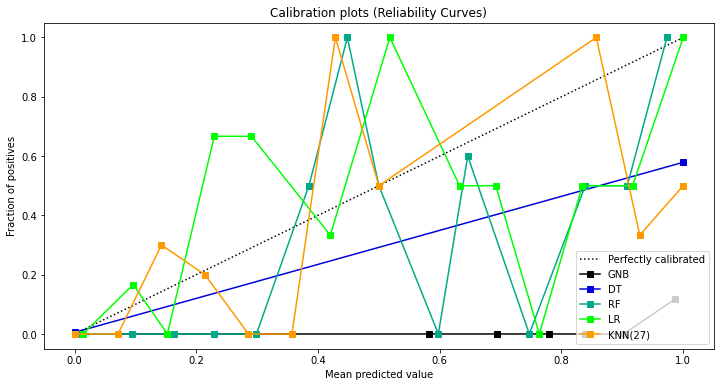

In [ ]:
# Calibration Curve (Reliability Curves)
probas_list = []
clf_names = []
for name, model in models:
  if (name=="KNN(27)"):
    Y_test_probs = model.predict_proba(x_test1)
  else:
    Y_test_probs = model.predict_proba(x_test)
  probas_list.append(Y_test_probs)
  clf_names.append(name)

skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names, n_bins=15, figsize=(12,6));

# KNN : find the optimal K

Minimum error:- 0.05238095238095238 at K = 27


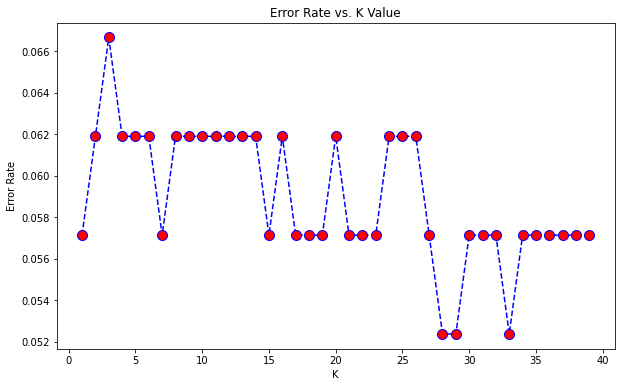

In [ ]:
# k variation for KNN
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train1,y_train)
 pred_i = knn.predict(x_test1)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9476190476190476 at K = 27


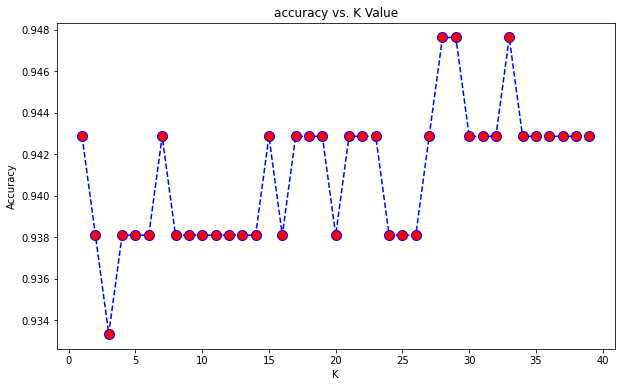

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train1,y_train)
    yhat = neigh.predict(x_test1)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# Estimator performance

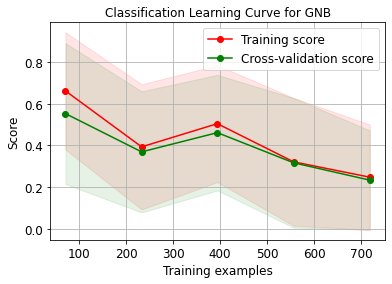

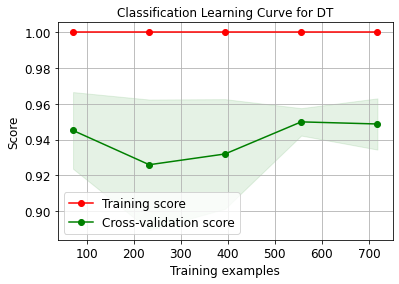

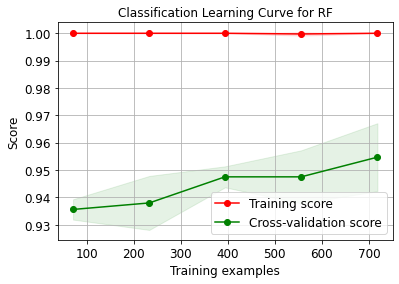

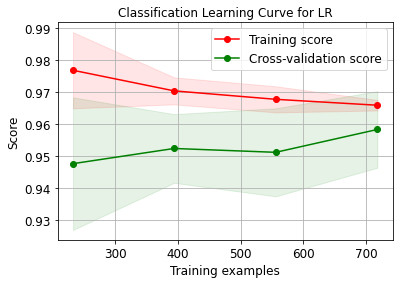

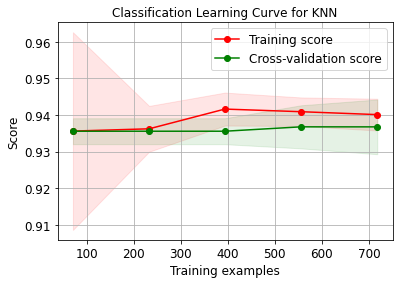

In [ ]:
#Cross Validation Performance
LR = LogisticRegression(random_state=1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GNB = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=27)

mod = []
mod.append(('GNB', GNB))
mod.append(('DT', DT))
mod.append(('RF', RF))
mod.append(('LR', LR))


for n , m in mod:
  skplt.estimators.plot_learning_curve(m, x, y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve for "+n);

skplt.estimators.plot_learning_curve(knn, df_scaled, y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve for KNN");

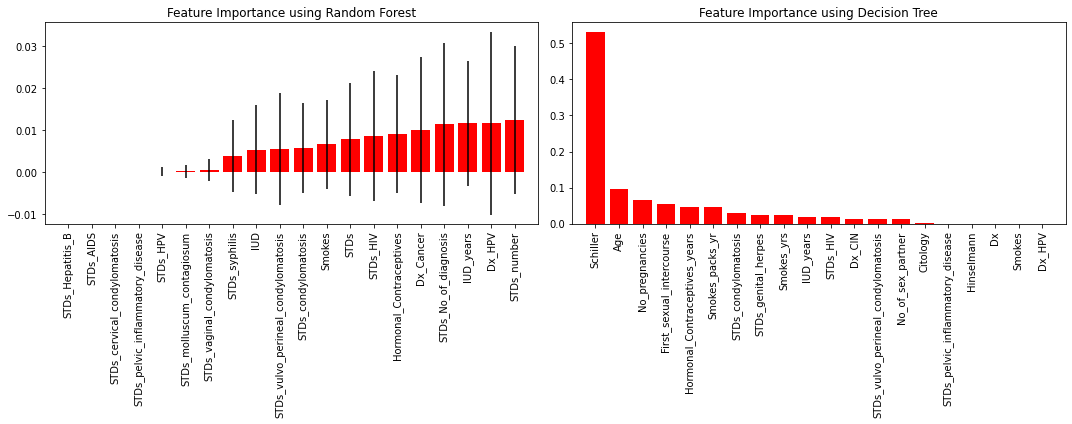

In [ ]:
# Feature importance option is not available for knn and LR and GNB !!!!!!!!!!!!!!!

# Feature importance for Random Forest
RF.fit(x_train, y_train)
RF.score(x_test, y_test)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(RF, feature_names=x.columns,
                                          title="Feature Importance using Random Forest",
                                          x_tick_rotation=90, order="ascending", ax=ax1);

# Feature importance for Decision Tree
DT.fit(x_train, y_train)
DT.score(x_test, y_test)

ax2 = fig.add_subplot(122)
skplt.estimators.plot_feature_importances(DT, feature_names=x.columns,
                                          title="Feature Importance using Decision Tree",
                                          x_tick_rotation=90, ax=ax2);
plt.tight_layout()

Feature: 0 Age, Score: 0.00222
Feature: 1 No_of_sex_partner, Score: 0.00616
Feature: 2 First_sexual_intercourse, Score: -0.06239
Feature: 3 No_pregnancies, Score: -0.16565
Feature: 4 Smokes, Score: -0.16428
Feature: 5 Smokes_yrs, Score: 0.01612
Feature: 6 Smokes_packs_yr, Score: 0.02942
Feature: 7 Hormonal_Contraceptives, Score: -0.00127
Feature: 8 Hormonal_Contraceptives_years, Score: 0.04359
Feature: 9 IUD, Score: 0.11763
Feature: 10 IUD_years, Score: 0.00569
Feature: 11 STDs, Score: 1.05418
Feature: 12 STDs_number, Score: -0.07389
Feature: 13 STDs_condylomatosis, Score: -0.02378
Feature: 14 STDs_cervical_condylomatosis, Score: 0.00000
Feature: 15 STDs_vaginal_condylomatosis, Score: -0.07173
Feature: 16 STDs_vulvo_perineal_condylomatosis, Score: 0.00292
Feature: 17 STDs_syphilis, Score: -1.16645
Feature: 18 STDs_pelvic_inflammatory_disease, Score: -0.02129
Feature: 19 STDs_genital_herpes, Score: 1.10776
Feature: 20 STDs_molluscum_contagiosum, Score: -0.01558
Feature: 21 STDs_AIDS, Sc

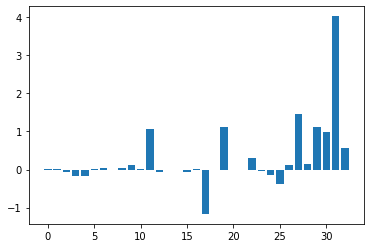

In [ ]:
from matplotlib import pyplot

# Logistic regression for feature importance
LR.fit(x, y)
# get importance
importance = LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d %s, Score: %.5f' % (i,x.columns[i],v))
# plot feature importance
pyplot.bar([z for z in range(len(importance))], importance)
pyplot.show()
#Bar Chart of Logistic Regression Coefficients as Feature Importance Scores

# Feature selection

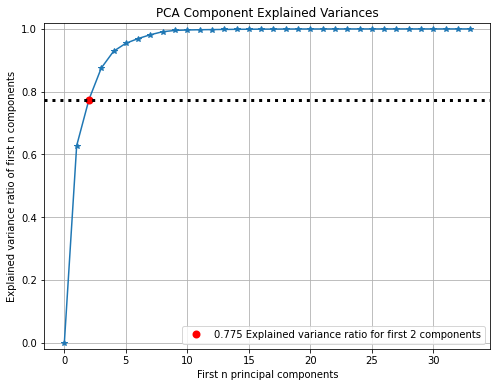

In [ ]:
#PCA Components Explained Variance
pca = PCA(random_state=1)
pca.fit(x_train)

skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

Optimal number of features : 9


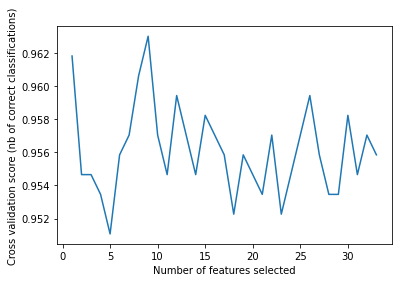

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=RF, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

Classification accuracy without selecting features: 0.948
Classification accuracy after univariate feature selection: 0.962


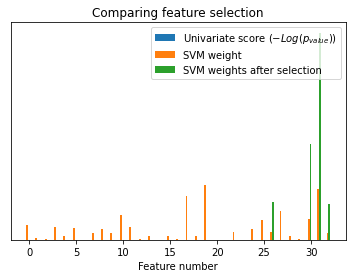

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# #############################################################################
# Import some data to play with
X_indices = np.arange(x.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4)
selector.fit(x_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(x_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(x_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')

clf_selected = make_pipeline( SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC())
clf_selected.fit(x_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(x_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

Oversampling / undersampling using smote
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

